In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('PDIR_200003_202204  amudalapalli m.csv')

In [3]:
df.head()

,time,Rain
0,2000-03-01,6
1,2000-04-01,15
2,2000-05-01,36
3,2000-06-01,253
4,2000-07-01,422


In [4]:
df.tail()

,time,Rain
261,2021-12-01,1
262,2022-01-01,0
263,2022-02-01,0
264,2022-03-01,1
265,2022-04-01,4


In [5]:
df.columns=["time","Rain"]
df.head()

,time,Rain
0,2000-03-01,6
1,2000-04-01,15
2,2000-05-01,36
3,2000-06-01,253
4,2000-07-01,422


In [6]:
df['time']=pd.to_datetime(df['time'])

In [7]:
df.head()

,time,Rain
0,2000-03-01,6
1,2000-04-01,15
2,2000-05-01,36
3,2000-06-01,253
4,2000-07-01,422


In [8]:
df.set_index('time',inplace=True)

In [9]:
df.head()

,Rain
time,
2000-03-01,6
2000-04-01,15
2000-05-01,36
2000-06-01,253
2000-07-01,422


In [10]:
df.describe()

,Rain
count,266.000000
mean,122.695489
std,158.392161
min,0.000000
25%,9.000000
50%,50.500000
75%,183.750000
max,1119.000000


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Rain'])

In [13]:
def adfuller_test(Rain):
    result=adfuller(Rain)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(df['Rain'])

ADF Test Statistic : -5.159916941405476
p-value : 1.0609117246696748e-05
#Lags Used : 16
Number of Observations Used : 249
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='time'>

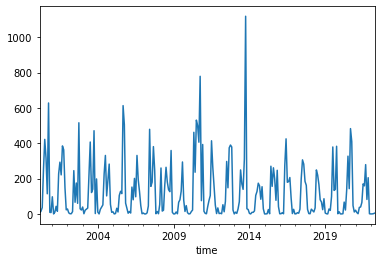

In [15]:
df['Rain'].plot()

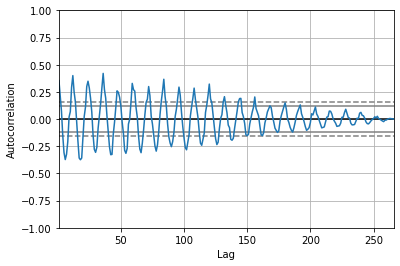

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Rain'])
plt.show()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

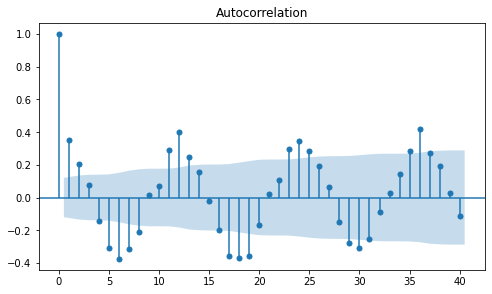

In [18]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Rain'].iloc[1:],lags=40,ax=ax1)

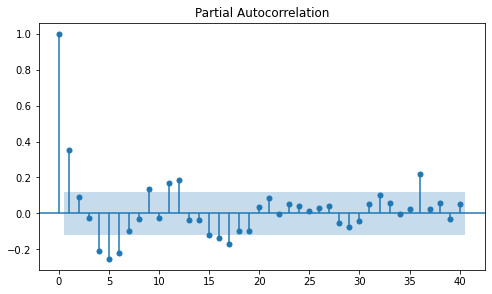

In [19]:
fig = plt.figure(figsize=(8,10))
ax2 = fig.add_subplot(211)
fig = plot_pacf(df['Rain'].iloc[1:],lags=40,ax=ax2)

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model=ARIMA(df['Rain'],order=(1,0,1))
model_fit=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Rain   No. Observations:                  266
Model:                     ARMA(1, 1)   Log Likelihood               -1705.626
Method:                       css-mle   S.D. of innovations            147.366
Date:                Wed, 18 May 2022   AIC                           3419.253
Time:                        15:13:42   BIC                           3433.587
Sample:                    03-01-2000   HQIC                          3425.011
                         - 04-01-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.9968     15.067      8.097      0.000      92.467     151.527
ar.L1.Rain     0.5006      0.109      4.573      0.000       0.286       0.715
ma.L1.Rain    -0.1649      0.117     -1.407      0.159      -0.394       0.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9976           +0.0000j            1.9976            0.0000
MA.1            6.0654           +0.0000j            6.0654            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='time'>

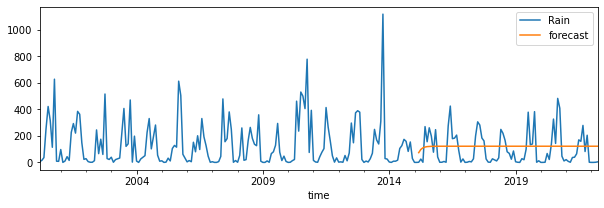

In [23]:
df['forecast']=model_fit.predict(start=180,end=265,dynamic=True)
df[['Rain','forecast']].plot(figsize=(10,3))

In [26]:
import statsmodels.api as sm

In [28]:
model=sm.tsa.statespace.SARIMAX(df['Rain'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='time'>

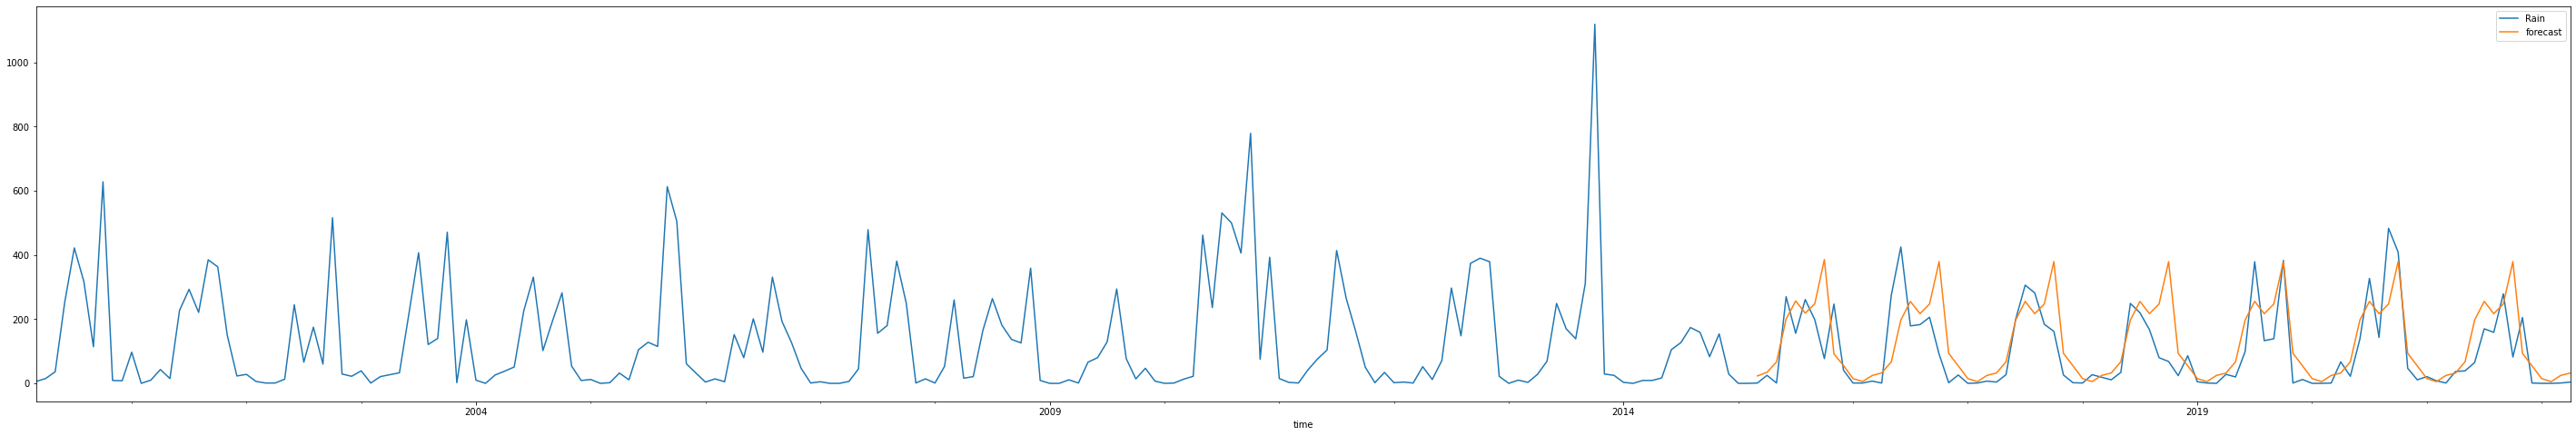

In [29]:
df['forecast']=results.predict(start=180,end=265,dynamic=True)
df[['Rain','forecast']].plot(figsize=(50,8))

In [30]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [31]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [32]:
future_datest_df.tail()

,Rain,forecast
2026-11-01,NaN,NaN
2026-12-01,NaN,NaN
2027-01-01,NaN,NaN
2027-02-01,NaN,NaN
2027-03-01,NaN,NaN


In [33]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

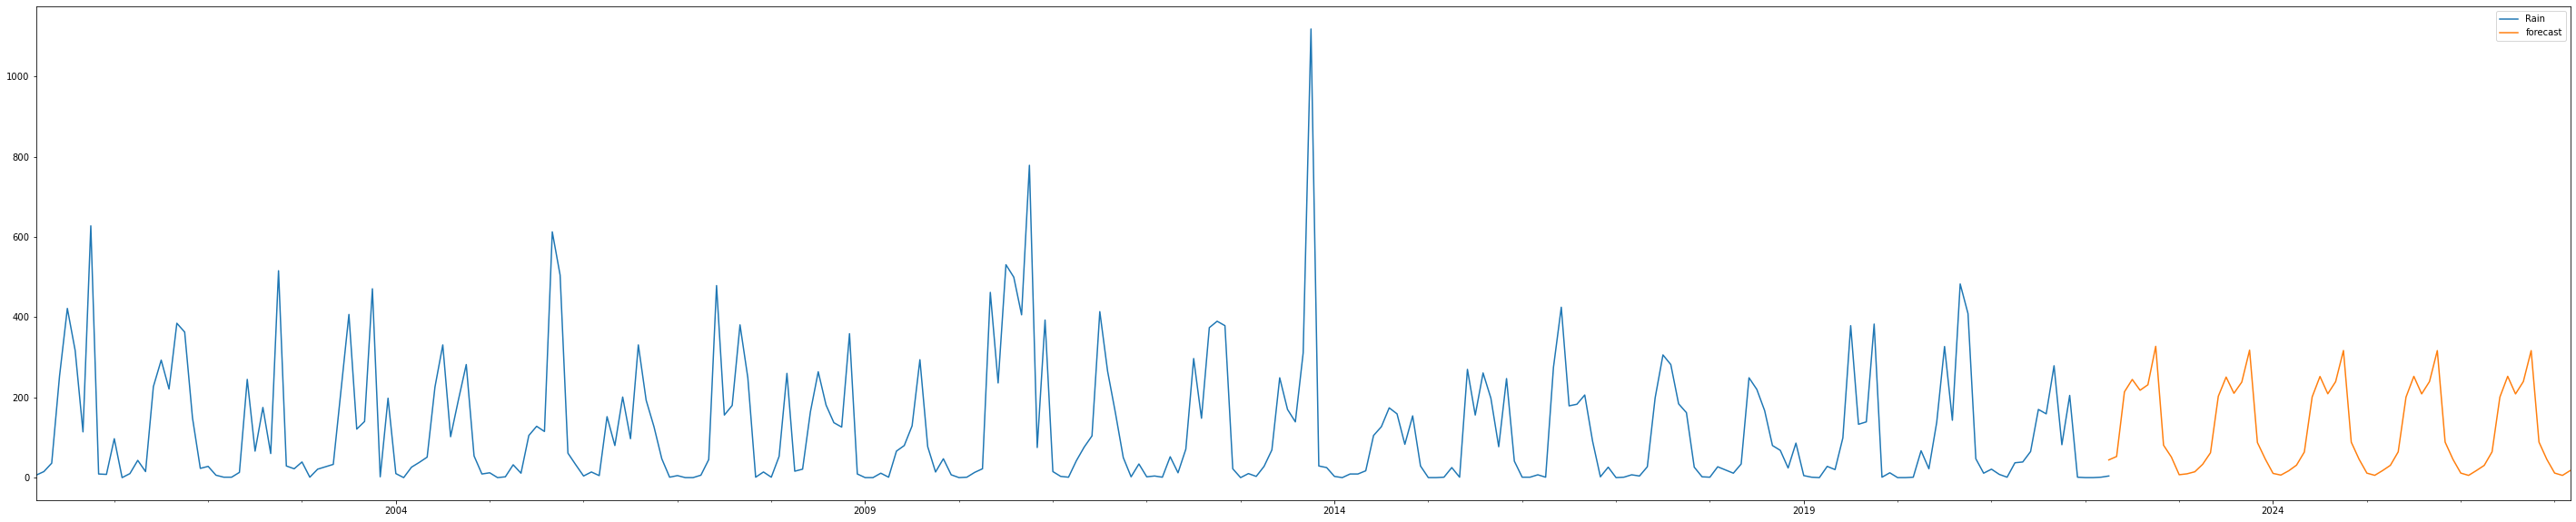

In [34]:
future_df['forecast'] = results.predict(start = 265, end = 325, dynamic= True)  
future_df[['Rain','forecast']].plot(figsize=(50,10))

In [35]:
future_df['forecast'].tail(60)

2022-04-01     44.111045
2022-05-01     52.637708
2022-06-01    213.911324
2022-07-01    244.783852
2022-08-01    217.852467
2022-09-01    231.567440
2022-10-01    327.468729
2022-11-01     80.824167
2022-12-01     51.291056
2023-01-01      7.180463
2023-02-01      9.442815
2023-03-01     14.570339
2023-04-01     33.167126
2023-05-01     61.895116
2023-06-01    202.777046
2023-07-01    250.753766
2023-08-01    210.284262
2023-09-01    238.144399
2023-10-01    317.896237
2023-11-01     87.539440
2023-12-01     46.479323
2024-01-01     10.457524
2024-02-01      6.267138
2024-03-01     16.957304
2024-04-01     31.048891
2024-05-01     63.765358
2024-06-01    201.187418
2024-07-01    252.223218
2024-08-01    209.034670
2024-09-01    239.245140
2024-10-01    316.998322
2024-11-01     88.361017
2024-12-01     45.736235
2025-01-01     11.128968
2025-02-01      5.681927
2025-03-01     17.479661
2025-04-01     30.589727
2025-05-01     64.169148
2025-06-01    200.831179
2025-07-01    252.535274
